In [65]:
import pandas as pd
import requests
%matplotlib inline
from config import key #google customsearch key

In [10]:
URL="https://www.googleapis.com/customsearch/v1?q=lolcat&cx=016367925189187468689%3Aghvlq4-mi7e&searchType=image&key="+key
r=requests.get(URL)
print(r.text)

{
 "kind": "customsearch#search",
 "url": {
  "type": "application/json",
  "template": "https://www.googleapis.com/customsearch/v1?q={searchTerms}&num={count?}&start={startIndex?}&lr={language?}&safe={safe?}&cx={cx?}&sort={sort?}&filter={filter?}&gl={gl?}&cr={cr?}&googlehost={googleHost?}&c2coff={disableCnTwTranslation?}&hq={hq?}&hl={hl?}&siteSearch={siteSearch?}&siteSearchFilter={siteSearchFilter?}&exactTerms={exactTerms?}&excludeTerms={excludeTerms?}&linkSite={linkSite?}&orTerms={orTerms?}&relatedSite={relatedSite?}&dateRestrict={dateRestrict?}&lowRange={lowRange?}&highRange={highRange?}&searchType={searchType}&fileType={fileType?}&rights={rights?}&imgSize={imgSize?}&imgType={imgType?}&imgColorType={imgColorType?}&imgDominantColor={imgDominantColor?}&alt=json"
 },
 "queries": {
  "request": [
   {
    "title": "Google Custom Search - lolcat",
    "totalResults": "5500000",
    "searchTerms": "lolcat",
    "count": 10,
    "startIndex": 1,
    "inputEncoding": "utf8",
    "outputEnco

In [3]:
cat_son=r.json()
index=[]
for cat in cat_son['items']:
    index.append((cat['link'],cat['snippet']))
index_df=pd.DataFrame(index, columns=['link','snippet'])
index_df.to_csv("index.csv")
index_df.head()

,link,snippet
0,https://media.mnn.com/assets/images/2012/11/lo...,Lolcats: Where they came from and why we love ...
1,https://upload.wikimedia.org/wikipedia/commons...,Lolcat - Wikipedia
2,https://media.mnn.com/assets/images/2012/11/pw...,Lolcats: Where they came from and why we love ...
3,https://upload.wikimedia.org/wikipedia/commons...,Lolcat - Wikipedia
4,https://media.mnn.com/assets/images/2012/11/ki...,Lolcats: Where they came from and why we love ...


In [25]:
for idx,page in index_df.iterrows():
    with open("train/%s_%s"%(idx,page['link'].split("/")[-1]),"wb") as file:
        file.write(requests.get(page['link']).content)

Analysis!

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.ml.KNearest_create() 
knn.train(train,cv2.ml.ROW_SAMPLE,train_labels)

ret,result,neighbours,dist = knn.findNearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
accuracy

91.76

In [17]:

# Load the data, converters convert the letter to a number
data= np.loadtxt('letter-recognition.data', dtype= 'float32', delimiter = ',',
                    converters= {0: lambda ch: ord(ch)-ord('A')})

# split the data to two, 10000 each for train and test
train, test = np.vsplit(data,2)

# split trainData and testData to features and responses
responses, trainData = np.hsplit(train,[1])
labels, testData = np.hsplit(test,[1])

# Initiate the kNN, classify, measure accuracy.
knn = cv2.ml.KNearest_create() 
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)
ret, result, neighbours, dist = knn.findNearest(testData, k=5)

correct = np.count_nonzero(result == labels)
accuracy = correct*100.0/10000
accuracy

93.06

In [18]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract'

In [44]:
train_df=pd.read_csv("train.csv",encoding="mbcs")
train_df.head()

,link,snippet,labels
0,http://media.mnn.com/assets/images/2012/11/pw_...,Lolcats: Where they came from and why we love ...,ur passwerd is FAIL entry are denied
1,https://upload.wikimedia.org/wikipedia/commons...,Lolcat - Wikipedia,IM IN UR FOLDUR KERUPTIN YR FYLEZ
2,http://media.mnn.com/assets/images/2012/11/kit...,Lolcats: Where they came from and why we love ...,food limit reached start sleep cycle
3,https://upload.wikimedia.org/wikipedia/commons...,Lolcat - Wikipedia,I ARE CRYING CUZ I ARE OUT OF FOCUSS
4,https://bighugelabs.com/img/lolcat-sample.jpg,Lolcat Generator: Can haz posters?,Im in ur computer makin ur graphix


In [24]:
pytesseract.image_to_string(Image.open('train/0_pw_1.jpg'))

u'-III\nur nasswenl Is [All\nM 1:\u2018\nV\u2018 \n\nX.\n  .-:4\n ,\n\nenLW.a;.\xe9;"\ufb02enied'

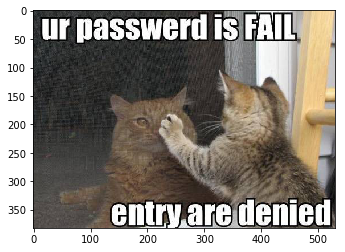

('Guess:', u'-III\nur nasswenl Is [All\nM 1:\u2018\nV\u2018 \n\nX.\n  .-:4\n ,\n\nenLW.a;.\xe9;"\ufb02enied')
('Answer:', u'ur passwerd is FAIL entry are denied')
   


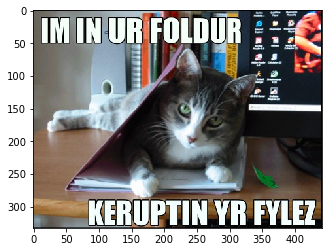

('Guess:', u'mum \u2018 \nIlllflllllllll ;,; A\nI 1  -;.=\\\n\n. /5 ;:\xab\n\nu\u2018\n\n/% \xa3-\n. ;m"PT|N VII FVIH')
('Answer:', u'IM IN UR FOLDUR KERUPTIN YR FYLEZ')
   


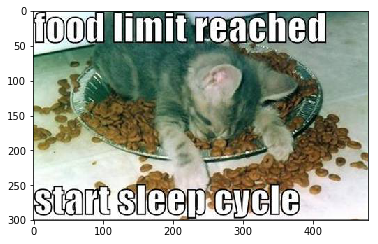

('Guess:', u'')
('Answer:', u'food limit reached start sleep cycle')
   


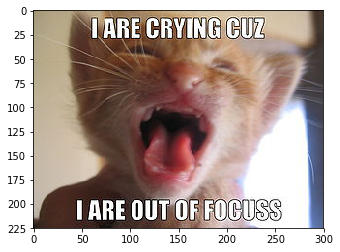

('Guess:', u'')
('Answer:', u'I ARE CRYING CUZ I ARE OUT OF FOCUSS')
   


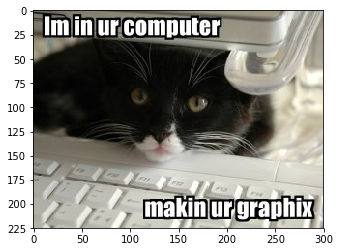

('Guess:', u'')
('Answer:', u'Im in ur computer makin ur graphix')
   


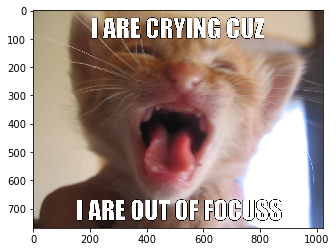

('Guess:', u'I ARE out 5@[%UU$$')
('Answer:', u'I ARE CRYING CUZ I ARE OUT OF FOCUSS')
   


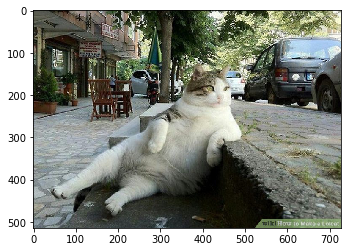

('Guess:', u'')
('Answer:', nan)
   


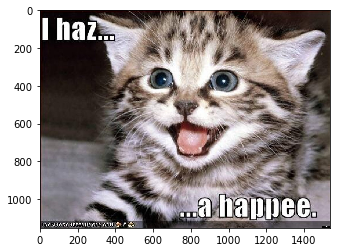

('Guess:', u'\u2018\\\\\\W \u2018 \u2018\'-r- \u2019>\u2018_\n\n-5.\n\nI.\n\nZ M \xb0"- - . F\n_t.. ,__\u2018\nIII ~ I\n., ,,')
('Answer:', u'I haz\u0160o happee.')
   


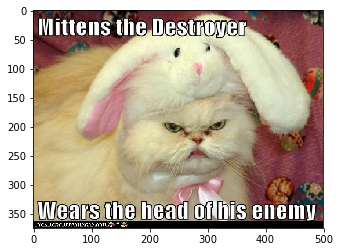

('Guess:', u'\ufb01zz\n\n \n\nT\ufb011\xae\ufb01]@EJG]\u2018 \ufb02iS  elli\xe9l\ufb02v')
('Answer:', u'Mittens the Destroyer Wears the head of his enemy')
   


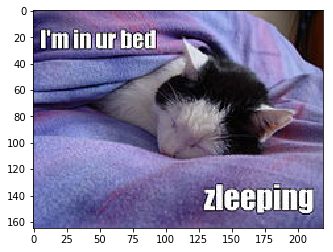

('Guess:', u'')
('Answer:', u"I'm in ur bed zleeping")
   


In [70]:
from matplotlib.pyplot import imshow
for idx,page in train_df.iterrows():
    file_name="train/%s_%s"%(idx,page['link'].split("/")[-1])
    img=Image.open(file_name)
    imshow(np.asarray(img))
    plt.show()
    print("Guess:",pytesseract.image_to_string(img))
    print("Answer:",page['labels'])
    print("   ")

### Try Algorithmia  
- https://algorithmia.com/algorithms/tesseractocr/OCR
- https://algorithmia.com/algorithms/ocr/RecognizeCharacters

In [1]:
import Algorithmia
from config import ALGORITHMIA_KEY
client = Algorithmia.client(ALGORITHMIA_KEY)

In [2]:
input = {"src":"data://ocr/SampleImages/businesscard.jpg",
"hocr":{
"tessedit_create_hocr":1,
"tessedit_pageseg_mode":1,
"tessedit_char_whitelist":"ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789-@/.,:()"}}

algo = client.algo('tesseractocr/OCR/0.1.0')
print algo.pipe(input)

AlgoResponse(result={u'result': u' \n \n \n \nAALGORITHMIA \nDIEGO \nOPPENHEIMER \nCEO \n65530@6I80FIIHM56.60"1 \nO \n@GOPPQHHQ \n206.552.9054 \nQ \nGOPPEHHEIFHQF \n \n \n', u'compound': {u'': 95, u'DIEGO': 88, u'CEO': 88, u'@GOPPQHHQ': 66, u'O': 77, u'OPPENHEIMER': 88, u'Q': 55, u'AALGORITHMIA': 53, u'206.552.9054': 84, u'65530@6I80FIIHM56.60"1': 62, u'GOPPEHHEIFHQF': 61}},metadata=Metadata(content_type='json',duration=1.405311559,stdout=None))


In [64]:

input = {"src":"https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Cat_crying_%28Lolcat%29.jpg/300px-Cat_crying_%28Lolcat%29.jpg",
"hocr":{
"tessedit_create_hocr":1,
"tessedit_pageseg_mode":1,
"tessedit_char_whitelist":"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"}}

algo = client.algo('tesseractocr/OCR/0.1.0')
response=algo.pipe(input)
response.result

{u'compound': {u'': 95, u'ABE': 75, u'I': 99, u'kWSS': 13, u'our': 73},
 u'result': u' \nI \nABE \nour \nkWSS \n'}

In [79]:
def callTesseractOCR(src):
    #https://algorithmia.com/algorithms/tesseractocr/OCR
    input = {"src":src,
             "hocr":{
                "tessedit_create_hocr":1,
                "tessedit_pageseg_mode":1,
                "tessedit_char_whitelist":"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
                }
            }

    algo = client.algo('tesseractocr/OCR/0.1.0')
    try:
        response=algo.pipe(input)
        return response.result['result']
    except:
        return "Error for %s"%src

def callRecognizeCharacters(src):
    algo = client.algo('ocr/RecognizeCharacters/0.3.0')
    return algo.pipe(src).result

u"ehis'en'emu"

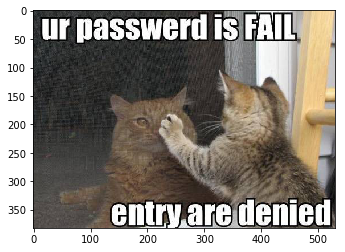

http://media.mnn.com/assets/images/2012/11/pw_1.jpg
('My Guess:', u'-III\nur nasswenl Is [All\nM 1:\u2018\nV\u2018 \n\nX.\n  .-:4\n ,\n\nenLW.a;.\xe9;"\ufb02enied')
('TesseractOCR:', u' \nIlll \nur \nnasswenl \nIS \ngnu \nM \nU \nV \ny \nI \nenLrvlarIiaillenieu \n')
('RecognizeCharacters', u'lll\' nasswenl iii Fl".\n\u2018 1"\niv 1\u201c\n\n   \n\nBllLW.\ufb02l{\xe9|"lll\xa5lliBll')
('Answer:', u'ur passwerd is FAIL entry are denied')
   


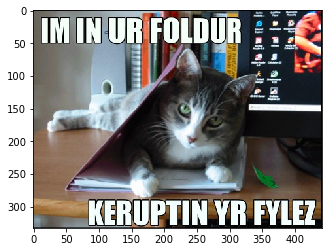

https://upload.wikimedia.org/wikipedia/commons/a/ab/Lolcat_in_folder.jpg
('My Guess:', u'mum \u2018 \nIlllflllllllll ;,; A\nI 1  -;.=\\\n\n. /5 ;:\xab\n\nu\u2018\n\n/% \xa3-\n. ;m"PT|N VII FVIH')
('TesseractOCR:', u'Error for https://upload.wikimedia.org/wikipedia/commons/a/ab/Lolcat_in_folder.jpg')
('RecognizeCharacters', u"INI m un mum: :\nI} A1 1%\u201c?\n\n,{\xe9-r\n\ni:\nI QEIIFI'IN YB FYlH")
('Answer:', u'IM IN UR FOLDUR KERUPTIN YR FYLEZ')
   


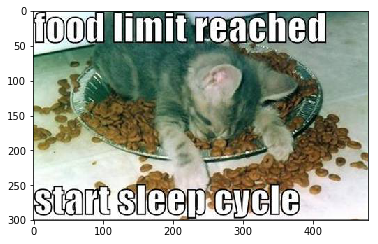

http://media.mnn.com/assets/images/2012/11/kitten_1.jpg
('My Guess:', u'')
('TesseractOCR:', u' \n')
('RecognizeCharacters', u'lilnit"r_e7a,,lc\u2018l_led')
('Answer:', u'food limit reached start sleep cycle')
   


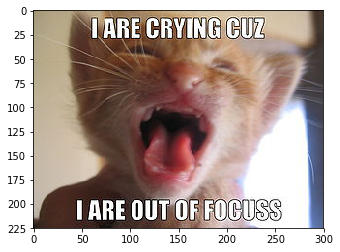

https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Cat_crying_%28Lolcat%29.jpg/300px-Cat_crying_%28Lolcat%29.jpg
('My Guess:', u'')
('TesseractOCR:', u' \nI \nABE \nour \nkWSS \n')
('RecognizeCharacters', u'IABEBUTUEFIJ')
('Answer:', u'I ARE CRYING CUZ I ARE OUT OF FOCUSS')
   


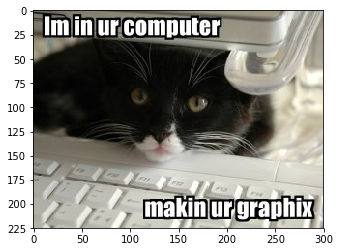

https://bighugelabs.com/img/lolcat-sample.jpg
('My Guess:', u'')
('TesseractOCR:', u' \n" \nWm \n')
('RecognizeCharacters', u"'7 mmw")
('Answer:', u'Im in ur computer makin ur graphix')
   


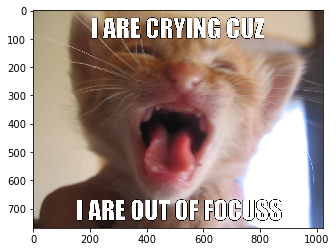

https://upload.wikimedia.org/wikipedia/commons/1/1a/Cat_crying_%28Lolcat%29.jpg
('My Guess:', u'I ARE out 5@[%UU$$')
('TesseractOCR:', u'Error for https://upload.wikimedia.org/wikipedia/commons/1/1a/Cat_crying_%28Lolcat%29.jpg')
('RecognizeCharacters', u'| an: on 5@@UU$$')
('Answer:', u'I ARE CRYING CUZ I ARE OUT OF FOCUSS')
   


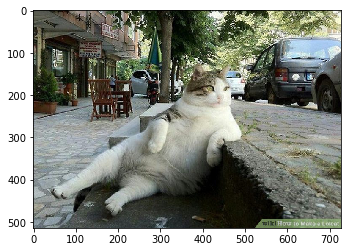

http://pad2.whstatic.com/images/thumb/e/e4/Make-a-Lolcat-Step-1.jpg/aid525207-v4-728px-Make-a-Lolcat-Step-1.jpg
('My Guess:', u'')
('TesseractOCR:', u' \n')
('RecognizeCharacters', u'')
('Answer:', nan)
   


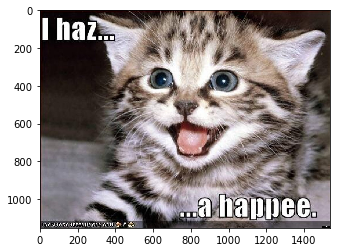

http://i.huffpost.com/gen/985599/images/o-TWITTER-LOLCAT-facebook.jpg
('My Guess:', u'\u2018\\\\\\W \u2018 \u2018\'-r- \u2019>\u2018_\n\n-5.\n\nI.\n\nZ M \xb0"- - . F\n_t.. ,__\u2018\nIII ~ I\n., ,,')
('TesseractOCR:', u' \n')
('RecognizeCharacters', u'')
('Answer:', u'I haz\u0160o happee.')
   


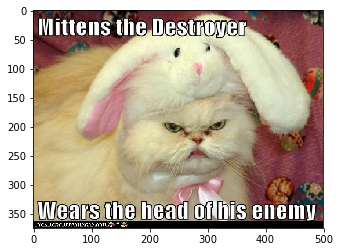

http://obeythekitty.com/wp-content/uploads/2015/01/funny_lolcat_history.jpg
('My Guess:', u'\ufb01zz\n\n \n\nT\ufb011\xae\ufb01]@EJG]\u2018 \ufb02iS  elli\xe9l\ufb02v')
('TesseractOCR:', u'Mingus" \nthe \nllesllrouxeir \nI \nill \nI \nXI \na \ne \nEJGEGJ \noi \nnis \nelfemv \n \n')
('RecognizeCharacters', u"ehis'en'emu")
('Answer:', u'Mittens the Destroyer Wears the head of his enemy')
   


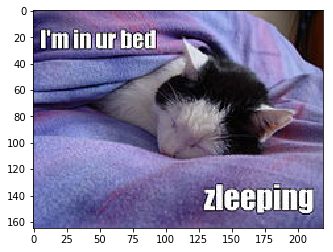

https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Lolcat.jpg/220px-Lolcat.jpg
('My Guess:', u'')
('TesseractOCR:', u' \n')
('RecognizeCharacters', u'')
('Answer:', u"I'm in ur bed zleeping")
   


In [80]:
from matplotlib.pyplot import imshow
results=[]
for idx,page in train_df.iterrows():
    file_name="train/%s_%s"%(idx,page['link'].split("/")[-1])
    img=Image.open(file_name)
    imshow(np.asarray(img))
    plt.show()
    print(page['link'])
    my_guess=pytesseract.image_to_string(img)
    tesseract_ocr=callTesseractOCR(page['link'])
    recognize_characters=callRecognizeCharacters(page['link'])
    
    print("My Guess:",my_guess)
    print("TesseractOCR:", tesseract_ocr)
    print("RecognizeCharacters", recognize_characters)
    print("Answer:",page['labels'])
    print("   ")
    results.append({"my_guess": my_guess, "TesseractOCR": tesseract_ocr, 
                    "RecognizeCharacters": recognize_characters, "True Text": page['labels']})

In [85]:
result_df=pd.DataFrame(results)
result_df

,RecognizeCharacters,TesseractOCR,True Text,my_guess
0,"lll' nasswenl iii Fl"".\n‘ 1""\niv 1“\n\n \n\n...",\nIlll \nur \nnasswenl \nIS \ngnu \nM \nU \nV...,ur passwerd is FAIL entry are denied,-III\nur nasswenl Is [All\nM 1:‘\nV‘ \n\nX.\n ...
1,"INI m un mum: :\nI} A1 1%“?\n\n,{é-r\n\ni:\nI ...",Error for https://upload.wikimedia.org/wikiped...,IM IN UR FOLDUR KERUPTIN YR FYLEZ,"mum ‘ \nIlllflllllllll ;,; A\nI 1 -;.=\\n\n. ..."
2,"lilnit""r_e7a,,lc‘l_led",\n,food limit reached start sleep cycle,
3,IABEBUTUEFIJ,\nI \nABE \nour \nkWSS \n,I ARE CRYING CUZ I ARE OUT OF FOCUSS,
4,'7 mmw,"\n"" \nWm \n",Im in ur computer makin ur graphix,
5,| an: on 5@@UU$$,Error for https://upload.wikimedia.org/wikiped...,I ARE CRYING CUZ I ARE OUT OF FOCUSS,I ARE out 5@[%UU$$
6,,\n,NaN,
7,,\n,I hazŠo happee.,"‘\\\W ‘ ‘'-r- ’>‘_\n\n-5.\n\nI.\n\nZ M °""- - ...."
8,ehis'en'emu,"Mingus"" \nthe \nllesllrouxeir \nI \nill \nI \n...",Mittens the Destroyer Wears the head of his enemy,ﬁzz\n\n \n\nTﬁ1®ﬁ]@EJG]‘ ﬂiS elliélﬂv
9,,\n,I'm in ur bed zleeping,


In [86]:
result_df.to_csv("algo-results.csv",index=False, encoding="mbcs")